In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

This notebook provides code for plotting the mean-variance tradeoff while trading on a noncomposable hook. Given a deterministic output function $G_1(\Delta)$ for a CFMM and a noncomposable hook with mean output $G_2(\Delta)$ and variance $\sigma^2(\Delta)$, we solve the problem:

\begin{align*}
\text{maximize} \quad & G_1(\Delta) + G_2(100- \Delta) - \lambda \sigma^2(\Delta),
\end{align*}
where the user is interested in trading $100$ units and has a tradeoff parameter $\lambda>0$. We solve this using CVX for $G_1(\Delta) = \log(\Delta + 1)$ and $G_2(\Delta) = \sqrt{\Delta}$, and for $\sigma^2(\Delta) = c$, $\sigma^2(\Delta) = k \Delta$, and $\sigma^2(\Delta) = k \Delta^2$. 

We plot the optimal objective value vs. $k$ below.

In [7]:
# Define output functions or `mean returns'
def G1(x):
    return np.log(x + 1) 

def G2(x):
    return np.sqrt(x)

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

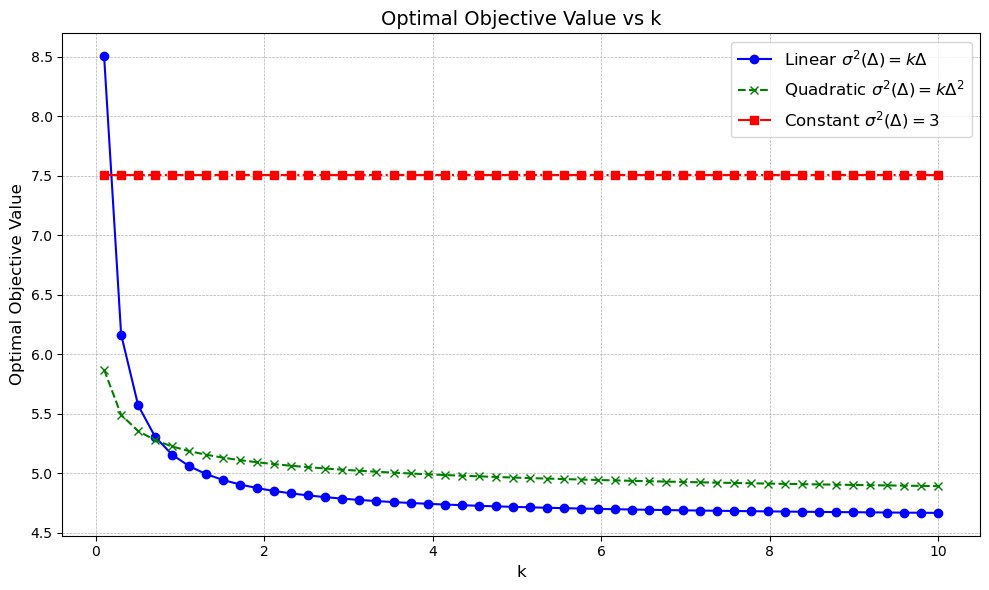

In [8]:
lambda_param = 0.5 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.log(100 - delta + 1)
G2_term = cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 0, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('optimal_objective_value_vs_k.png', dpi=500)
plt.show()